In [2]:
# !pip install -U sentence-transformers

In [2]:
import os, sys
import json

import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm

from sentence_transformers import SentenceTransformer

sys.path.append(os.path.abspath(os.path.join(os.getcwd(),'..')))
from utils import Dataset_Reader, save_tensor, load_tensor
from models.BiLSTM import BiLSTM

/home/kshitij/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/kshitij/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
with open('../data/train.json', 'r') as file:
    train_data = json.load(file)

with open('../data/dev.json', 'r') as file:
    test_data = json.load(file)

TRAIN_data = Dataset_Reader(train_data)
TEST_data = Dataset_Reader(test_data)

In [10]:
sent_transformer = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/home/kshitij/.local/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [34]:
model_st = BiLSTM(dropout=0.2)
model_opt_st = torch.optim.Adam(model_st.parameters(), lr=5e-5)
loss_function = nn.CrossEntropyLoss()

model_bert = BiLSTM(dropout=0.2)
model_opt_bert = torch.optim.Adam(model_bert.parameters(), lr=1e-5)
loss_function = nn.CrossEntropyLoss()

# model2 = BiLSTM()
# model_opt2 = torch.optim.Adam(model.parameters(), lr=5e-5)

# model3 = BiLSTM()
# model_opt3 = torch.optim.Adam(model.parameters(), lr=8e-5)

In [41]:
batch_loss1 = []
print(f'{"Starting Training":-^100}')
model_st.train()
for epoch in range(25):
    total_loss = 0
    for idx in tqdm(range(246)):
        TRAIN_emb = load_tensor(filepath=f"../train_document/doc_{idx}/st_embedding")
        TRAIN_labels = load_tensor(filepath=f"../train_document/doc_{idx}/label")
        if TRAIN_emb.size(0) == 0:
            continue
        output = model_st(TRAIN_emb.unsqueeze(1))
        loss = loss_function(output,TRAIN_labels)
        
        model_opt_st.zero_grad()
        loss.backward()
        model_opt_st.step()
        
        total_loss += loss.item()
        
    print(f"Epoch: {epoch+1} \t Loss: {total_loss/246:.5f}")
    batch_loss1.append(total_loss/246)

-----------------------------------------Starting Training------------------------------------------


100%|██████████| 246/246 [00:18<00:00, 13.31it/s]


Epoch: 1 	 Loss: 2.03927


100%|██████████| 246/246 [00:16<00:00, 15.10it/s]


Epoch: 2 	 Loss: 2.05243


100%|██████████| 246/246 [00:16<00:00, 15.20it/s]


Epoch: 3 	 Loss: 2.02535


100%|██████████| 246/246 [00:16<00:00, 14.97it/s]


Epoch: 4 	 Loss: 2.02089


100%|██████████| 246/246 [00:16<00:00, 14.99it/s]


Epoch: 5 	 Loss: 2.01914


100%|██████████| 246/246 [00:15<00:00, 15.38it/s]


Epoch: 6 	 Loss: 2.01653


100%|██████████| 246/246 [00:16<00:00, 15.18it/s]


Epoch: 7 	 Loss: 2.01470


100%|██████████| 246/246 [00:16<00:00, 14.77it/s]


Epoch: 8 	 Loss: 2.01494


100%|██████████| 246/246 [00:16<00:00, 14.96it/s]


Epoch: 9 	 Loss: 2.02140


100%|██████████| 246/246 [00:16<00:00, 15.20it/s]


Epoch: 10 	 Loss: 2.01449


100%|██████████| 246/246 [00:16<00:00, 15.34it/s]


Epoch: 11 	 Loss: 2.01337


100%|██████████| 246/246 [00:17<00:00, 14.38it/s]


Epoch: 12 	 Loss: 2.03185


100%|██████████| 246/246 [00:16<00:00, 15.14it/s]


Epoch: 13 	 Loss: 2.02309


100%|██████████| 246/246 [00:16<00:00, 15.17it/s]


Epoch: 14 	 Loss: 2.01366


100%|██████████| 246/246 [00:16<00:00, 14.73it/s]


Epoch: 15 	 Loss: 2.01233


100%|██████████| 246/246 [00:17<00:00, 14.37it/s]


Epoch: 16 	 Loss: 2.01175


100%|██████████| 246/246 [00:16<00:00, 14.93it/s]


Epoch: 17 	 Loss: 2.01163


100%|██████████| 246/246 [00:16<00:00, 14.51it/s]


Epoch: 18 	 Loss: 2.01313


100%|██████████| 246/246 [00:16<00:00, 14.66it/s]


Epoch: 19 	 Loss: 2.02528


100%|██████████| 246/246 [00:16<00:00, 14.96it/s]


Epoch: 20 	 Loss: 2.02280


100%|██████████| 246/246 [00:16<00:00, 15.21it/s]


Epoch: 21 	 Loss: 2.01469


100%|██████████| 246/246 [00:16<00:00, 15.35it/s]


Epoch: 22 	 Loss: 2.01689


100%|██████████| 246/246 [00:16<00:00, 14.84it/s]


Epoch: 23 	 Loss: 2.01030


100%|██████████| 246/246 [00:16<00:00, 14.96it/s]


Epoch: 24 	 Loss: 2.00900


100%|██████████| 246/246 [00:15<00:00, 15.38it/s]

Epoch: 25 	 Loss: 2.00828


In [44]:
batch_loss2 = []
print(f'{"Starting Training":-^100}')
model_bert.train()
for epoch in range(200):
    total_loss = 0
    for idx in tqdm(range(246)):
        TRAIN_emb = load_tensor(filepath=f"../train_document/doc_{idx}/embedding")
        TRAIN_labels = load_tensor(filepath=f"../train_document/doc_{idx}/label")
        if TRAIN_emb.size(0) == 0:
            continue
        output = model_bert(TRAIN_emb)
        loss = loss_function(output,TRAIN_labels)
        
        model_opt_bert.zero_grad()
        loss.backward()
        model_opt_bert.step()
        total_loss += loss.item()
        
    print(f"Epoch: {epoch+1} \t Loss: {total_loss/246:.5f}")
    batch_loss2.append(total_loss/246)

-----------------------------------------Starting Training------------------------------------------


100%|██████████| 246/246 [00:25<00:00,  9.72it/s]


Epoch: 1 	 Loss: 1.95469


100%|██████████| 246/246 [00:25<00:00,  9.83it/s]


Epoch: 2 	 Loss: 1.95330


100%|██████████| 246/246 [00:21<00:00, 11.27it/s]


Epoch: 3 	 Loss: 1.95424


100%|██████████| 246/246 [00:21<00:00, 11.54it/s]


Epoch: 4 	 Loss: 1.95960


100%|██████████| 246/246 [00:33<00:00,  7.35it/s]


Epoch: 5 	 Loss: 1.95160


100%|██████████| 246/246 [00:28<00:00,  8.64it/s]


Epoch: 6 	 Loss: 1.95183


100%|██████████| 246/246 [00:29<00:00,  8.45it/s]


Epoch: 7 	 Loss: 1.94830


100%|██████████| 246/246 [00:36<00:00,  6.66it/s]


Epoch: 8 	 Loss: 1.94933


100%|██████████| 246/246 [00:28<00:00,  8.78it/s]


Epoch: 9 	 Loss: 1.94832


100%|██████████| 246/246 [00:29<00:00,  8.26it/s]


Epoch: 10 	 Loss: 1.95102


100%|██████████| 246/246 [00:28<00:00,  8.57it/s]


Epoch: 11 	 Loss: 1.95740


100%|██████████| 246/246 [00:28<00:00,  8.70it/s]


Epoch: 12 	 Loss: 1.95157


100%|██████████| 246/246 [00:28<00:00,  8.74it/s]


Epoch: 13 	 Loss: 1.94807


100%|██████████| 246/246 [00:27<00:00,  9.01it/s]


Epoch: 14 	 Loss: 1.94670


100%|██████████| 246/246 [00:28<00:00,  8.77it/s]


Epoch: 15 	 Loss: 1.94666


100%|██████████| 246/246 [00:28<00:00,  8.64it/s]


Epoch: 16 	 Loss: 1.94952


100%|██████████| 246/246 [00:28<00:00,  8.77it/s]


Epoch: 17 	 Loss: 1.95114


100%|██████████| 246/246 [00:28<00:00,  8.64it/s]


Epoch: 18 	 Loss: 1.94735


100%|██████████| 246/246 [00:28<00:00,  8.79it/s]


Epoch: 19 	 Loss: 1.94550


100%|██████████| 246/246 [00:27<00:00,  8.79it/s]


Epoch: 20 	 Loss: 1.94794


100%|██████████| 246/246 [00:28<00:00,  8.56it/s]


Epoch: 21 	 Loss: 1.94463


100%|██████████| 246/246 [00:27<00:00,  9.03it/s]


Epoch: 22 	 Loss: 1.94377


100%|██████████| 246/246 [00:27<00:00,  8.95it/s]


Epoch: 23 	 Loss: 1.94301


100%|██████████| 246/246 [00:27<00:00,  8.90it/s]


Epoch: 24 	 Loss: 1.94168


100%|██████████| 246/246 [00:27<00:00,  9.02it/s]


Epoch: 25 	 Loss: 1.94431


100%|██████████| 246/246 [00:28<00:00,  8.78it/s]


Epoch: 26 	 Loss: 1.94264


100%|██████████| 246/246 [00:27<00:00,  8.94it/s]


Epoch: 27 	 Loss: 1.95574


100%|██████████| 246/246 [00:28<00:00,  8.67it/s]


Epoch: 28 	 Loss: 1.94508


100%|██████████| 246/246 [00:27<00:00,  9.00it/s]


Epoch: 29 	 Loss: 1.94190


100%|██████████| 246/246 [00:28<00:00,  8.72it/s]


Epoch: 30 	 Loss: 1.94075


100%|██████████| 246/246 [00:27<00:00,  8.93it/s]


Epoch: 31 	 Loss: 1.93973


100%|██████████| 246/246 [00:28<00:00,  8.60it/s]


Epoch: 32 	 Loss: 1.93799


100%|██████████| 246/246 [00:27<00:00,  8.99it/s]


Epoch: 33 	 Loss: 1.93770


100%|██████████| 246/246 [00:27<00:00,  8.96it/s]


Epoch: 34 	 Loss: 1.93729


100%|██████████| 246/246 [00:27<00:00,  8.91it/s]


Epoch: 35 	 Loss: 1.93904


100%|██████████| 246/246 [00:28<00:00,  8.74it/s]


Epoch: 36 	 Loss: 1.94184


100%|██████████| 246/246 [00:27<00:00,  8.79it/s]


Epoch: 37 	 Loss: 1.94164


100%|██████████| 246/246 [00:27<00:00,  8.94it/s]


Epoch: 38 	 Loss: 1.93900


100%|██████████| 246/246 [00:28<00:00,  8.74it/s]


Epoch: 39 	 Loss: 1.93715


100%|██████████| 246/246 [00:27<00:00,  8.85it/s]


Epoch: 40 	 Loss: 1.93618


100%|██████████| 246/246 [00:30<00:00,  8.00it/s]


Epoch: 41 	 Loss: 1.93720


100%|██████████| 246/246 [00:27<00:00,  9.00it/s]


Epoch: 42 	 Loss: 1.93695


100%|██████████| 246/246 [00:28<00:00,  8.61it/s]


Epoch: 43 	 Loss: 1.93603


100%|██████████| 246/246 [00:27<00:00,  8.99it/s]


Epoch: 44 	 Loss: 1.94332


100%|██████████| 246/246 [00:28<00:00,  8.73it/s]


Epoch: 45 	 Loss: 1.95218


100%|██████████| 246/246 [00:27<00:00,  8.99it/s]


Epoch: 46 	 Loss: 1.93912


100%|██████████| 246/246 [00:27<00:00,  8.85it/s]


Epoch: 47 	 Loss: 1.93803


100%|██████████| 246/246 [00:27<00:00,  8.89it/s]


Epoch: 48 	 Loss: 1.93576


100%|██████████| 246/246 [00:28<00:00,  8.75it/s]


Epoch: 49 	 Loss: 1.93525


100%|██████████| 246/246 [00:27<00:00,  8.87it/s]


Epoch: 50 	 Loss: 1.93412


100%|██████████| 246/246 [00:28<00:00,  8.49it/s]


Epoch: 51 	 Loss: 1.93465


100%|██████████| 246/246 [00:28<00:00,  8.75it/s]


Epoch: 52 	 Loss: 1.93365


100%|██████████| 246/246 [00:27<00:00,  9.05it/s]


Epoch: 53 	 Loss: 1.93363


100%|██████████| 246/246 [00:28<00:00,  8.52it/s]


Epoch: 54 	 Loss: 1.93475


100%|██████████| 246/246 [00:27<00:00,  9.00it/s]


Epoch: 55 	 Loss: 1.93495


100%|██████████| 246/246 [00:29<00:00,  8.36it/s]


Epoch: 56 	 Loss: 1.93400


100%|██████████| 246/246 [00:27<00:00,  9.05it/s]


Epoch: 57 	 Loss: 1.93514


100%|██████████| 246/246 [00:28<00:00,  8.69it/s]


Epoch: 58 	 Loss: 1.93713


100%|██████████| 246/246 [00:28<00:00,  8.70it/s]


Epoch: 59 	 Loss: 1.93673


100%|██████████| 246/246 [00:27<00:00,  8.90it/s]


Epoch: 60 	 Loss: 1.93461


100%|██████████| 246/246 [00:27<00:00,  8.90it/s]


Epoch: 61 	 Loss: 1.93334


100%|██████████| 246/246 [00:28<00:00,  8.58it/s]


Epoch: 62 	 Loss: 1.93266


100%|██████████| 246/246 [00:27<00:00,  8.87it/s]


Epoch: 63 	 Loss: 1.93204


100%|██████████| 246/246 [00:30<00:00,  7.99it/s]


Epoch: 64 	 Loss: 1.93307


100%|██████████| 246/246 [00:27<00:00,  8.88it/s]


Epoch: 65 	 Loss: 1.93359


100%|██████████| 246/246 [00:27<00:00,  8.90it/s]


Epoch: 66 	 Loss: 1.93307


100%|██████████| 246/246 [00:27<00:00,  8.94it/s]


Epoch: 67 	 Loss: 1.93257


100%|██████████| 246/246 [00:27<00:00,  8.98it/s]


Epoch: 68 	 Loss: 1.93185


100%|██████████| 246/246 [00:27<00:00,  8.92it/s]


Epoch: 69 	 Loss: 1.93199


100%|██████████| 246/246 [00:27<00:00,  8.91it/s]


Epoch: 70 	 Loss: 1.93159


100%|██████████| 246/246 [00:27<00:00,  8.89it/s]


Epoch: 71 	 Loss: 1.93246


100%|██████████| 246/246 [00:27<00:00,  8.81it/s]


Epoch: 72 	 Loss: 1.93327


100%|██████████| 246/246 [00:28<00:00,  8.74it/s]


Epoch: 73 	 Loss: 1.95291


100%|██████████| 246/246 [00:27<00:00,  8.85it/s]


Epoch: 74 	 Loss: 1.93962


100%|██████████| 246/246 [00:28<00:00,  8.72it/s]


Epoch: 75 	 Loss: 1.93507


100%|██████████| 246/246 [00:27<00:00,  8.82it/s]


Epoch: 76 	 Loss: 1.93279


100%|██████████| 246/246 [00:27<00:00,  8.99it/s]


Epoch: 77 	 Loss: 1.93195


100%|██████████| 246/246 [00:27<00:00,  8.95it/s]


Epoch: 78 	 Loss: 1.93168


100%|██████████| 246/246 [00:27<00:00,  8.94it/s]


Epoch: 79 	 Loss: 1.93641


100%|██████████| 246/246 [00:27<00:00,  8.93it/s]


Epoch: 80 	 Loss: 1.93348


100%|██████████| 246/246 [00:27<00:00,  8.85it/s]


Epoch: 81 	 Loss: 1.93061


100%|██████████| 246/246 [00:27<00:00,  8.79it/s]


Epoch: 82 	 Loss: 1.93078


100%|██████████| 246/246 [00:28<00:00,  8.67it/s]


Epoch: 83 	 Loss: 1.93148


100%|██████████| 246/246 [00:27<00:00,  8.87it/s]


Epoch: 84 	 Loss: 1.93096


100%|██████████| 246/246 [00:27<00:00,  8.97it/s]


Epoch: 85 	 Loss: 1.93046


100%|██████████| 246/246 [00:28<00:00,  8.61it/s]


Epoch: 86 	 Loss: 1.93043


100%|██████████| 246/246 [00:27<00:00,  8.93it/s]


Epoch: 87 	 Loss: 1.93079


100%|██████████| 246/246 [00:27<00:00,  8.91it/s]


Epoch: 88 	 Loss: 1.93067


100%|██████████| 246/246 [00:28<00:00,  8.76it/s]


Epoch: 89 	 Loss: 1.93310


100%|██████████| 246/246 [00:27<00:00,  8.98it/s]


Epoch: 90 	 Loss: 1.92972


100%|██████████| 246/246 [00:27<00:00,  8.84it/s]


Epoch: 91 	 Loss: 1.93151


100%|██████████| 246/246 [00:31<00:00,  7.73it/s]


Epoch: 92 	 Loss: 1.93445


100%|██████████| 246/246 [00:28<00:00,  8.64it/s]


Epoch: 93 	 Loss: 1.92976


100%|██████████| 246/246 [00:28<00:00,  8.77it/s]


Epoch: 94 	 Loss: 1.92941


100%|██████████| 246/246 [00:27<00:00,  8.86it/s]


Epoch: 95 	 Loss: 1.92913


100%|██████████| 246/246 [00:28<00:00,  8.62it/s]


Epoch: 96 	 Loss: 1.92965


100%|██████████| 246/246 [00:29<00:00,  8.40it/s]


Epoch: 97 	 Loss: 1.92859


100%|██████████| 246/246 [00:20<00:00, 11.74it/s]


Epoch: 98 	 Loss: 1.92837


100%|██████████| 246/246 [00:21<00:00, 11.70it/s]


Epoch: 99 	 Loss: 1.92926


100%|██████████| 246/246 [00:21<00:00, 11.68it/s]


Epoch: 100 	 Loss: 1.93087


100%|██████████| 246/246 [00:21<00:00, 11.61it/s]


Epoch: 101 	 Loss: 1.92915


100%|██████████| 246/246 [00:21<00:00, 11.57it/s]


Epoch: 102 	 Loss: 1.93208


100%|██████████| 246/246 [00:20<00:00, 12.04it/s]


Epoch: 103 	 Loss: 1.92929


100%|██████████| 246/246 [00:21<00:00, 11.43it/s]


Epoch: 104 	 Loss: 1.92848


100%|██████████| 246/246 [00:21<00:00, 11.68it/s]


Epoch: 105 	 Loss: 1.92767


100%|██████████| 246/246 [00:20<00:00, 11.92it/s]


Epoch: 106 	 Loss: 1.92884


100%|██████████| 246/246 [00:23<00:00, 10.50it/s]


Epoch: 107 	 Loss: 1.92899


100%|██████████| 246/246 [00:23<00:00, 10.51it/s]


Epoch: 108 	 Loss: 1.92901


100%|██████████| 246/246 [00:27<00:00,  8.89it/s]


Epoch: 109 	 Loss: 1.92838


100%|██████████| 246/246 [00:21<00:00, 11.37it/s]


Epoch: 110 	 Loss: 1.92827


100%|██████████| 246/246 [00:20<00:00, 11.98it/s]


Epoch: 111 	 Loss: 1.92841


100%|██████████| 246/246 [00:21<00:00, 11.51it/s]


Epoch: 112 	 Loss: 1.92765


100%|██████████| 246/246 [00:20<00:00, 11.95it/s]


Epoch: 113 	 Loss: 1.92913


100%|██████████| 246/246 [00:20<00:00, 12.07it/s]


Epoch: 114 	 Loss: 1.92859


100%|██████████| 246/246 [00:21<00:00, 11.56it/s]


Epoch: 115 	 Loss: 1.92846


100%|██████████| 246/246 [00:21<00:00, 11.63it/s]


Epoch: 116 	 Loss: 1.92800


100%|██████████| 246/246 [00:20<00:00, 11.82it/s]


Epoch: 117 	 Loss: 1.92724


100%|██████████| 246/246 [00:21<00:00, 11.58it/s]


Epoch: 118 	 Loss: 1.92695


100%|██████████| 246/246 [00:20<00:00, 11.83it/s]


Epoch: 119 	 Loss: 1.92926


100%|██████████| 246/246 [00:21<00:00, 11.63it/s]


Epoch: 120 	 Loss: 1.92738


100%|██████████| 246/246 [00:21<00:00, 11.28it/s]


Epoch: 121 	 Loss: 1.92762


100%|██████████| 246/246 [00:20<00:00, 11.91it/s]


Epoch: 122 	 Loss: 1.92712


100%|██████████| 246/246 [00:22<00:00, 11.17it/s]


Epoch: 123 	 Loss: 1.92774


100%|██████████| 246/246 [00:21<00:00, 11.52it/s]


Epoch: 124 	 Loss: 1.92749


100%|██████████| 246/246 [00:20<00:00, 12.01it/s]


Epoch: 125 	 Loss: 1.92887


100%|██████████| 246/246 [00:20<00:00, 11.76it/s]


Epoch: 126 	 Loss: 1.92819


100%|██████████| 246/246 [00:21<00:00, 11.29it/s]


Epoch: 127 	 Loss: 1.92729


100%|██████████| 246/246 [00:20<00:00, 11.85it/s]


Epoch: 128 	 Loss: 1.92667


100%|██████████| 246/246 [00:21<00:00, 11.71it/s]


Epoch: 129 	 Loss: 1.92705


100%|██████████| 246/246 [00:20<00:00, 11.79it/s]


Epoch: 130 	 Loss: 1.92683


100%|██████████| 246/246 [00:21<00:00, 11.63it/s]


Epoch: 131 	 Loss: 1.92672


100%|██████████| 246/246 [00:21<00:00, 11.46it/s]


Epoch: 132 	 Loss: 1.92712


100%|██████████| 246/246 [00:21<00:00, 11.70it/s]


Epoch: 133 	 Loss: 1.92695


100%|██████████| 246/246 [00:20<00:00, 11.81it/s]


Epoch: 134 	 Loss: 1.92783


100%|██████████| 246/246 [00:22<00:00, 10.83it/s]


Epoch: 135 	 Loss: 1.92729


100%|██████████| 246/246 [00:20<00:00, 11.72it/s]


Epoch: 136 	 Loss: 1.92733


100%|██████████| 246/246 [00:20<00:00, 11.98it/s]


Epoch: 137 	 Loss: 1.92634


100%|██████████| 246/246 [00:21<00:00, 11.68it/s]


Epoch: 138 	 Loss: 1.92647


100%|██████████| 246/246 [00:20<00:00, 11.92it/s]


Epoch: 139 	 Loss: 1.92630


100%|██████████| 246/246 [00:20<00:00, 11.93it/s]


Epoch: 140 	 Loss: 1.92661


100%|██████████| 246/246 [00:21<00:00, 11.49it/s]


Epoch: 141 	 Loss: 1.93027


100%|██████████| 246/246 [00:20<00:00, 11.80it/s]


Epoch: 142 	 Loss: 1.92877


100%|██████████| 246/246 [00:20<00:00, 11.81it/s]


Epoch: 143 	 Loss: 1.92610


100%|██████████| 246/246 [00:21<00:00, 11.60it/s]


Epoch: 144 	 Loss: 1.92552


100%|██████████| 246/246 [00:20<00:00, 11.90it/s]


Epoch: 145 	 Loss: 1.92523


100%|██████████| 246/246 [00:21<00:00, 11.38it/s]


Epoch: 146 	 Loss: 1.92588


100%|██████████| 246/246 [00:21<00:00, 11.68it/s]


Epoch: 147 	 Loss: 1.92615


100%|██████████| 246/246 [00:20<00:00, 11.86it/s]


Epoch: 148 	 Loss: 1.92576


100%|██████████| 246/246 [00:21<00:00, 11.54it/s]


Epoch: 149 	 Loss: 1.92516


100%|██████████| 246/246 [00:20<00:00, 11.76it/s]


Epoch: 150 	 Loss: 1.92563


100%|██████████| 246/246 [00:20<00:00, 11.97it/s]


Epoch: 151 	 Loss: 1.92611


100%|██████████| 246/246 [00:21<00:00, 11.44it/s]


Epoch: 152 	 Loss: 1.92599


100%|██████████| 246/246 [00:20<00:00, 11.84it/s]


Epoch: 153 	 Loss: 1.92742


100%|██████████| 246/246 [00:20<00:00, 12.00it/s]


Epoch: 154 	 Loss: 1.92690


100%|██████████| 246/246 [00:21<00:00, 11.55it/s]


Epoch: 155 	 Loss: 1.92561


100%|██████████| 246/246 [00:20<00:00, 11.97it/s]


Epoch: 156 	 Loss: 1.92554


100%|██████████| 246/246 [00:20<00:00, 11.93it/s]


Epoch: 157 	 Loss: 1.92570


100%|██████████| 246/246 [00:21<00:00, 11.60it/s]


Epoch: 158 	 Loss: 1.92543


100%|██████████| 246/246 [00:20<00:00, 12.03it/s]


Epoch: 159 	 Loss: 1.92722


100%|██████████| 246/246 [00:21<00:00, 11.62it/s]


Epoch: 160 	 Loss: 1.93526


100%|██████████| 246/246 [00:21<00:00, 11.59it/s]


Epoch: 161 	 Loss: 1.92658


100%|██████████| 246/246 [00:20<00:00, 12.06it/s]


Epoch: 162 	 Loss: 1.92524


100%|██████████| 246/246 [00:21<00:00, 11.68it/s]


Epoch: 163 	 Loss: 1.92482


100%|██████████| 246/246 [00:23<00:00, 10.51it/s]


Epoch: 164 	 Loss: 1.92513


100%|██████████| 246/246 [00:20<00:00, 11.73it/s]


Epoch: 165 	 Loss: 1.92526


100%|██████████| 246/246 [00:20<00:00, 11.77it/s]


Epoch: 166 	 Loss: 1.92510


100%|██████████| 246/246 [00:21<00:00, 11.66it/s]


Epoch: 167 	 Loss: 1.92483


100%|██████████| 246/246 [00:20<00:00, 11.94it/s]


Epoch: 168 	 Loss: 1.92510


100%|██████████| 246/246 [00:20<00:00, 11.77it/s]


Epoch: 169 	 Loss: 1.92469


100%|██████████| 246/246 [00:21<00:00, 11.63it/s]


Epoch: 170 	 Loss: 1.92521


100%|██████████| 246/246 [00:20<00:00, 12.09it/s]


Epoch: 171 	 Loss: 1.92525


100%|██████████| 246/246 [00:20<00:00, 11.77it/s]


Epoch: 172 	 Loss: 1.92551


100%|██████████| 246/246 [00:20<00:00, 11.78it/s]


Epoch: 173 	 Loss: 1.92521


100%|██████████| 246/246 [00:20<00:00, 11.76it/s]


Epoch: 174 	 Loss: 1.92552


100%|██████████| 246/246 [00:21<00:00, 11.51it/s]


Epoch: 175 	 Loss: 1.92514


100%|██████████| 246/246 [00:20<00:00, 12.03it/s]


Epoch: 176 	 Loss: 1.92435


100%|██████████| 246/246 [00:20<00:00, 11.81it/s]


Epoch: 177 	 Loss: 1.92537


100%|██████████| 246/246 [00:21<00:00, 11.42it/s]


Epoch: 178 	 Loss: 1.92504


100%|██████████| 246/246 [00:20<00:00, 12.11it/s]


Epoch: 179 	 Loss: 1.92618


100%|██████████| 246/246 [00:20<00:00, 11.81it/s]


Epoch: 180 	 Loss: 1.92491


100%|██████████| 246/246 [00:21<00:00, 11.60it/s]


Epoch: 181 	 Loss: 1.92485


100%|██████████| 246/246 [00:20<00:00, 11.92it/s]


Epoch: 182 	 Loss: 1.92489


100%|██████████| 246/246 [00:20<00:00, 11.88it/s]


Epoch: 183 	 Loss: 1.92496


100%|██████████| 246/246 [00:21<00:00, 11.28it/s]


Epoch: 184 	 Loss: 1.92590


100%|██████████| 246/246 [00:20<00:00, 11.94it/s]


Epoch: 185 	 Loss: 1.92650


100%|██████████| 246/246 [00:21<00:00, 11.69it/s]


Epoch: 186 	 Loss: 1.92431


100%|██████████| 246/246 [00:21<00:00, 11.55it/s]


Epoch: 187 	 Loss: 1.93276


100%|██████████| 246/246 [00:20<00:00, 11.86it/s]


Epoch: 188 	 Loss: 1.92475


100%|██████████| 246/246 [00:21<00:00, 11.60it/s]


Epoch: 189 	 Loss: 1.92463


100%|██████████| 246/246 [00:25<00:00,  9.72it/s]


Epoch: 190 	 Loss: 1.92418


100%|██████████| 246/246 [00:21<00:00, 11.63it/s]


Epoch: 191 	 Loss: 1.92472


100%|██████████| 246/246 [00:21<00:00, 11.61it/s]


Epoch: 192 	 Loss: 1.92446


100%|██████████| 246/246 [00:20<00:00, 11.86it/s]


Epoch: 193 	 Loss: 1.92427


100%|██████████| 246/246 [00:20<00:00, 11.74it/s]


Epoch: 194 	 Loss: 1.92411


100%|██████████| 246/246 [00:21<00:00, 11.49it/s]


Epoch: 195 	 Loss: 1.92511


100%|██████████| 246/246 [00:20<00:00, 11.74it/s]


Epoch: 196 	 Loss: 1.92484


100%|██████████| 246/246 [00:20<00:00, 11.80it/s]


Epoch: 197 	 Loss: 1.92453


100%|██████████| 246/246 [00:21<00:00, 11.38it/s]


Epoch: 198 	 Loss: 1.92719


100%|██████████| 246/246 [00:20<00:00, 12.00it/s]


Epoch: 199 	 Loss: 1.92509


100%|██████████| 246/246 [00:20<00:00, 11.84it/s]

Epoch: 200 	 Loss: 1.92434


In [45]:
def save_model(model, filepath):
    """
    Save PyTorch model parameters to a file.

    Args:
    - model (torch.nn.Module): PyTorch model to save.
    - filepath (str): Filepath to save the model parameters.
    """
    torch.save(model.state_dict(), filepath)
    print(f"Model parameters saved to '{filepath}'")

In [46]:
save_model(model_bert, '../models/BiLSTM_bert.pth')

Model parameters saved to '../models/BiLSTM_bert.pth'


In [25]:
def test_accuracy(x_test, y_test, model):
    model.eval()
    output = model(x_test)
    acc = sum(output.argmax(dim=1) == y_test)/ output.size(0)
    # print(f"Test Accuracy {acc*100:.2f}%")
    return acc*100

In [48]:
acc1 = 0
acc2 = 0
for i in range(29):
    TEST_emb_st = load_tensor(filepath=f"../test_document/doc_{i}/st_embedding").unsqueeze(1)
    TEST_emb_bert = load_tensor(filepath=f"../test_document/doc_{i}/embedding")
    
    TEST_labels = load_tensor(filepath=f"../test_document/doc_{i}/label")
    acc1 += test_accuracy(TEST_emb_st, TEST_labels, model_st)
    acc2 += test_accuracy(TEST_emb_bert, TEST_labels, model_bert)
    
print(acc1/30)
print(acc2/30)

tensor(60.7679)
tensor(67.7229)


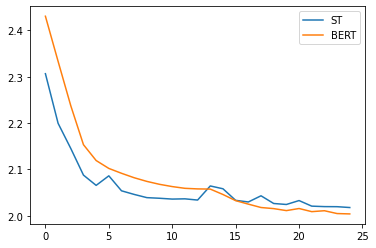

In [40]:
import seaborn as sns
sns.lineplot(x= range(len(batch_loss1)), y= batch_loss1, label = "ST");
sns.lineplot(x= range(len(batch_loss2)), y= batch_loss2, label = "BERT");


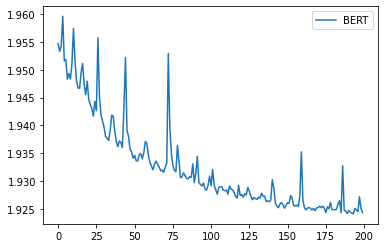

In [47]:
sns.lineplot(x= range(len(batch_loss2)), y= batch_loss2, label = "BERT");

In [11]:
# for idx in tqdm(range(len(TEST_data))):
#     TRAIN_emb = torch.from_numpy(sent_transformer.encode(TEST_data[idx]['text']))
#     save_tensor(TRAIN_emb, '../test_document/doc_'+str(idx),"st_embedding")

100%|██████████| 30/30 [00:17<00:00,  1.72it/s]


In [3]:
512 // 2

256